## Module 1: Time Complexity
#### Sort Example
We will go line by line and identify the number of computational steps

In [1]:
from itertools import chain
import time
import random
import matplotlib.pyplot as plt
#import heapq as hq

### Bubble Sort - Inefficient
Has unneccessary iteration, because we don't need to scan the whole list once the item has been rearranged. This has about twice the number of computational steps.

In [2]:
def BubbleSortInefficient(MyArray):
    '''
    Performs a bubble sort, but poorly
    Arguments: MyArray, a list to be sorted
    Returns: none
    '''
    n = len(MyArray)                                 # c1 - constant number of steps 
    for dummy in range(n):                            # c2*n - linear number of steps
        for i in range(n-1):                         # c4*n(n-1) - quadratic number of steps
            if MyArray[i+1] < MyArray[i]:            # c5*n(n-1)
                temp = MyArray[i]                    # c6*n(n-1)
                MyArray[i] = MyArray[i+1]            # c7*n(n-1)
                MyArray[i+1] = temp                  # c8*n(n-1)
            #else - do nothing
# Overall computational step count T(n) for insertions sort with list of size n: 
# T(n) = c1 + c2*n + (c4 + c5 +c6 + c7 + c8)(n(n-1))
#      = c1 + c9*n + c10(n(n-1))

### Bubble Sort - Efficient 
Sorted items go to end of list, so we no longer iterate over the entire list, leaving out the items we have already sorted. 

In [3]:
def BubbleSort(MyArray):
    '''
    Performs bubble sort
    Arguments: MyArray - list to be sorted
    Returns: none
    '''
    n = len(MyArray)                                 # c1 - constant number of steps
    while n > 0:                                     # c2*n - linear number of steps
        AlreadySorted = True                         # c3*n
        for i in range(n-1):                         # c4(1+2+3+...+n) - quadratic number of steps
            if MyArray[i+1] < MyArray[i]:            # c5*n(n-1)/2
                temp = MyArray[i]                    # c6*n(n-1)/2
                MyArray[i] = MyArray[i+1]            # c7*n(n-1)/2
                MyArray[i+1] = temp                  # c8*n(n-1)/2
                AlreadySorted = False                # c9*n(n-1)/2
        if AlreadySorted:
            break
        n = n - 1

# Overall computational step count T(n) for insertions sort with list of size n
# T(n) = c1 + c2*n + c3*n + (c4 + c5 + c6 + c7 + c8 + c9)(n(n-1)/2)
#      = c1 + c10*n + c11(n(n-1)/2)

### Actually Running the functions

Text(0, 0.5, 'Time')

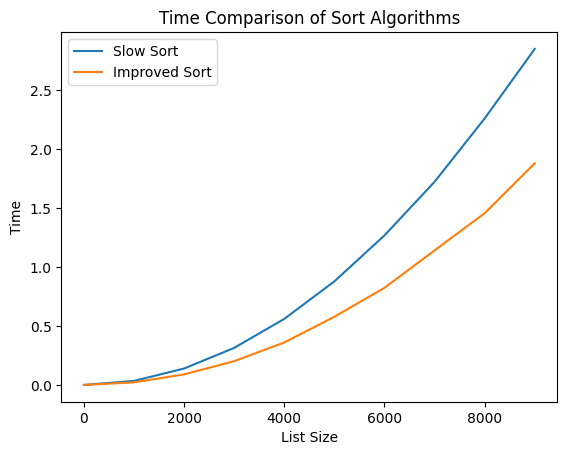

In [4]:
SlowSort = []
ImprovedSort = []

Size = 10000                                          
StepSize = 1000

# We are running trials of lists in lengths 0 - 10000, increasing by 1000
for i in range(0,Size,StepSize):
    # Create list
    RandList = random.sample(range(0,Size), i)
    RandListCopy = RandList.copy()
    # Inefficient Sort
    Start = time.perf_counter()
    BubbleSortInefficient(RandListCopy)
    SlowSort.append(time.perf_counter() - Start)
    # Efficient Sort
    Start = time.perf_counter()
    BubbleSort(RandList)
    ImprovedSort.append(time.perf_counter() - Start)

# Plotting Results
plt.plot(range(0, Size, StepSize), SlowSort, label = 'Slow Sort')
plt.plot(range(0, Size, StepSize), ImprovedSort, label = 'Improved Sort')
plt.legend(frameon = 'none')
plt.title('Time Comparison of Sort Algorithms')
plt.xlabel('List Size')
plt.ylabel('Time')



### Conclusion 
We see that we see that the improved code is about twice as fast. The curve of Improved Sort is increasing more slowly than the Slow Sort. 